###Importy

In [ ]:
# tu budú zobrazené všetky importy knižnic, ktoré budeme v projekte používať
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# neurónová sieť
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# vizualizácia
import matplotlib.pyplot as plt

##1. Predpríprava dát
Ako prvý krok bude importnutie datasetu a jeho zobrazenie v pandas dataframe.

In [ ]:
# pomocou knižnice pandas načítaj csv a vytvor z neho dataframe
dataset = pd.read_csv("/content/drive/MyDrive/Škola/NS/Laca_NS2021/dataset.csv")
# ukáž prvé riadky nového dataframu
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# generuje popisné štatistiky. 
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# vypíše informácie o dátovom rámci vrátane dtypu indexu a stĺpcov, nenulových hodnôt a využitia pamäte 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Ďalším dôležitým krokom je rozdelenie dát do dvoch polí, kde v poli ***'X'*** budú vlastnosti telefónov a v poli ***'y'*** cenová kategória telefónov.

In [ ]:
# vyber z dataframu hodnoty do 20 a ulož ich do pola 'X'
X = dataset.iloc[:,:20].values
# vyber z dataframu hodnoty od 20 a ulož ich do pola 'y' (iba prince_range teda)
y = dataset.iloc[:,20:].values

# zobraz vytvorené polia
print("Pole X: " + str(X))
print("\n")
print("Pole y: " + str(y))

Pole X: [[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


Pole y: [[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]


### Normalizácia dát

Cieľom normalizácie je zmeniť hodnoty číselných stĺpcov v množine údajov na spoločnú škálu bez toho, aby došlo k narušeniu rozdielov v rozsahoch hodnôt. Nie je vždy nutné robiť normalizáciu. Vyžaduje sa, iba ak sa v datasete vyskytujú rôzne rozsahy. 

V tomto datasete je nutné spraviť normalizáciu pretože sa tu vyskytujú hodnoty ako `battery_power` čo sa pohybuje v tisíckach a hodnoty `clock_speed` ktoré sú aj ***0.6*** napríklad. 

Na jej implementáciu som použil `StandardScaler` z kniźnice `sklearn.preprocessing`

In [ ]:
# vytvoríme nový StandardScaler
standard_scaler = StandardScaler()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného StandardScaleru na pole 
# vlastností 'X', ktorá sa prispôsobí údajom a potom ich transformuje. 
X = standard_scaler.fit_transform(X)
# následne vypíšeme prvý riadok už z transformovaného pola
print(X[0])

[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


### Použitie OneHotEncoderu

Dôležitým krokom je proces prevodu celočíselných tried na binárne hodnoty aby som s nimi dokázal ďalej pracovať. Na uskutočnenie tohoto prevodu som použil práve `OneHotEncoder` z knižnice  `sklearn.preprocessing`. Spôsob fungovania možno vidieť na nasledujúcom obrázku, kde je zakódovaných prvých 5 riadkov datasetu: 

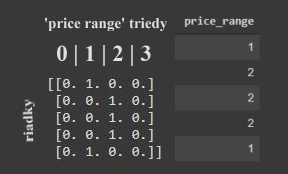

Teraz existuje pre `price_range` jedna jedinečná binárna hodnota. Nové vytvorené pole bude mať tvar ('**n**' * počet tried), kde n je počet riadkov v datasete.

In [ ]:
# vytvoríme nový OneHotEncoder
one_hot_encoder = OneHotEncoder()
# aplikujeme metódu 'fit_transfrom' z novo vytvoreného OneHotEncoder na pole 
# tried 'y', ktorá sa prispôsobí údajom a potom ich transformuje do pola. 
y = one_hot_encoder.fit_transform(y).toarray()
# následne vypíšeme prvých 5. riadkov už z transformovaného pola
print(y[0:5])

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### Rozdelenie dát na trénovacie a testovacie

Predtým než prejdem k budovaniu neurónovej siete je dôležité si rozdeliť dateset na dáta ***trénovacie*** a dáta ***testovacie***, kde na trénovacich dátach budem neurónovú sieť trénovať a na už testovanie natrénovanej neurónovej siete použijem testovacie dáta.

Na rozdelenie dát použijem funkciu `train_test_split` z knižnice `sklearn.model_selection`. Veľkosť trénovacich a testovacích dát určuje parameter `test_size`, kde napríklad hodnota ***0.2*** bude znamenať že budeme mať ***80%*** trénovacich dát a ***20%*** dát bude testovacích. 


In [ ]:
# pomocou 'train_test_split' vytvoríme nasledovné premenné: 
# X_train kde budú uložené trénovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# X_test kde budú uložené testovacie dáta z pola 'X' (vlastnosti telefónov) v danom pomere test_size
# y_train kde budú uložené trénovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
# y_test kde budú uložené testovacie dáta z pola 'y' (cenové kategórie telefónov) v danom pomere test_size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# vypíšeme prvých 5 riadkov z každej premennej 
print("X - trénovacie dáta: \n" + str(X_train[0:5]) + "\n")
print("X - testovacie dáta: \n" + str(X_test[0:5]) + "\n")
print("y - trénovacie dáta: \n" + str(y_train[0:5]) + "\n")
print("y - testovacie dáta: \n" + str(y_test[0:5]) + "\n")

X - trénovacie dáta: 
[[-1.29867442 -0.9900495   0.95335845 -1.01918398 -0.53209893  0.95788598
   0.87940816 -0.69968647 -0.74168985 -1.53917473  1.49823547 -1.01451112
   0.0936943  -0.8513106   0.40204724  1.43112714 -1.28345734  0.55964063
   0.99401789 -1.01409939]
 [-1.47850256  1.0100505   0.95335845  0.98117712 -0.76249466 -1.04396559
   1.59600992  0.34073951  0.55808283 -0.22756439  0.01377252 -0.48709192
  -1.01023884 -0.0103397   0.16464114  0.2831028  -1.6495841   0.55964063
  -1.00601811  0.98609664]
 [ 1.33956369  1.0100505  -0.88532709 -1.01918398 -0.07130748 -1.04396559
   1.59600992  1.38116548 -0.289595    1.08404594 -0.15116781 -0.88378329
   1.18605582  0.52448829 -1.0223894  -0.63531667 -0.73426721 -1.78686097
   0.99401789  0.98609664]
 [-0.74097956 -0.9900495   0.21788424  0.98117712 -0.76249466  0.95788598
   0.49354568 -0.69968647 -1.05250506 -1.53917473  0.67353383 -0.48258406
  -0.24882584  0.14180964  0.63945335 -0.63531667  1.27942995  0.55964063
   0.9940

##2. Neurónová sieť

### Modelovanie

Na modelovanie neurónovej siete som použil ***Keras***, čo je knižnica neurónovej siete s otvoreným zdrojovým kódom napísaná v jazyku Python. Je navrhnutá tak, aby umožňovala rýchle experimenty s hlbokými neurónovými sieťami. Primárnym dôvodom, prečo som si vybral práve ***Keras*** je jeho užívateľská prívetivosť, modulárnosť a ľahká implementácia. 

In [ ]:
# keďže máme jeden vstup a očakávame jeden výstup, vytvárame sekvenčný model.
# výstup každej pridanej vrstvy je vstupom do ďalšej vrstvy. 
neural_network = Sequential()
# pomocou '.add' pridávame vrstvy do neurónovej siete. 
# argumenty ktoré vstupujú do Dense vrsty je:
# výstup dimenzia, ktorá je v prvom prípade 16
# vstupná dimenzia v prvej vrstve, ktorá sa rovná počtu elementov, v tomto prípade to je 20
neural_network.add(Dense(15, input_dim=20, activation='relu'))
# výstupná dimenzia vo výstupnej vrtsve je rovná 4, čo predstavuje cenovú kategóriu
# telefónov
# aktivačná funkcia je v tomto prípade 'softmax' keďže klasifikujeme viaceré triedy 
neural_network.add(Dense(4, activation='softmax'))
# nakoniec skontrolujeme, či vrstvy modelu vydávajú dáta správne a či sú parametre správne
# pomocou metódy summery() 
neural_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 64        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Prevedie keras model na dot formát a uloží ho do súboru. 

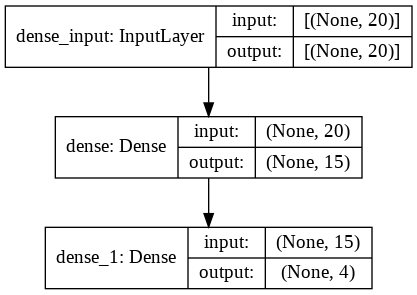

In [ ]:
plot_model(neural_network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Na špecifikovanie stratovej funkcie a optimalizátora použijem funkciu `compile`

* Keďže mám viaceré cenové triedy telefónov, ako stratovú funkciu použijem `categorical_crossentropy`.
* Optimalizátorom som si pre 1. pokus zvolil `adam`.
* `metrics` sa používajú na určenie spôsobu, akým chceme hodnotiť výkon neurónovej siete. Tu som to špecifikoval na `accuracy` (presnosť).  

In [ ]:
neural_network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Trénovanie

Na trénovanie neurónovej siete použijem funkciu `fit` kde zadám:
* vytvorené trénovacie dáta ***x*** a ***y***
* počet iterácií (pre začiatok som si zvolil 150)
* `batch_size`, ktorý slúži k tomu, keď máme veľký dataset aby sme netrénovali 
veľa dát naraz ale v menších častiach postupne

In [ ]:
network_training = neural_network.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=120, batch_size=50, shuffle=True)

Epoch 1/120
32/32 [==============================] - 1s 18ms/step - loss: 1.6730 - accuracy: 0.2700 - val_loss: 1.5492 - val_accuracy: 0.2700
Epoch 2/120
32/32 [==============================] - 0s 3ms/step - loss: 1.5049 - accuracy: 0.2935 - val_loss: 1.4588 - val_accuracy: 0.2775
Epoch 3/120
32/32 [==============================] - 0s 2ms/step - loss: 1.4354 - accuracy: 0.3000 - val_loss: 1.3933 - val_accuracy: 0.3100
Epoch 4/120
32/32 [==============================] - 0s 3ms/step - loss: 1.3735 - accuracy: 0.3311 - val_loss: 1.3400 - val_accuracy: 0.3450
Epoch 5/120
32/32 [==============================] - 0s 3ms/step - loss: 1.3211 - accuracy: 0.3661 - val_loss: 1.2902 - val_accuracy: 0.3850
Epoch 6/120
32/32 [==============================] - 0s 3ms/step - loss: 1.2476 - accuracy: 0.4149 - val_loss: 1.2415 - val_accuracy: 0.4400
Epoch 7/120
32/32 [==============================] - 0s 3ms/step - loss: 1.1775 - accuracy: 0.4605 - val_loss: 1.1918 - val_accuracy: 0.4800
Epoch 8/120


## 3. Testovanie

Prvým krokom bude získanie predpovede natrénovaného modelu na testovacích dátach. Na to som použil metódu `preditct()`

In [ ]:
network_prediction = neural_network.predict(X_test)
# vytvoril som prázdny list, do ktorého budem ukladať najviac
# pravdepodobnú predpoveď natrénovaného modelu
prediction_list = list()
for i in range(len(network_prediction)):
    # prechádzam jednotlivými predikciami modelu a
    # z každého pridám najviac pravdepodobnú predpoveď do listu 
    prediction_list.append(np.argmax(network_prediction[i]))

# na skúšku si vypíšem prvý riadok z listu a porovnám to o krok neskôr so skutočnosťou
print("Predpoveď modelu: ", prediction_list[0])

Predpoveď modelu:  3


Ďalším krokom bude získanie skutočných dát

In [ ]:
# vytvoril som prázdny list, do ktorého budem ukladať skutočné hodnoty
# z testovacích dát
testdata_list = list()
for i in range(len(y_test)):
    # prechádzam jednotlivými predikciami modelu a
    # z každého pridám skutočnú hodnotu do listu 
    testdata_list.append(np.argmax(y_test[i]))

# na skúšku si vypíšeme prvý riadok z listu skutočných testovacích dát a porovnáme s predpoveďou 
print("Skutočná hodnota: ", testdata_list[0])

Skutočná hodnota:  3


Nakoniec porovnám presnosť predpovede natrénovaného modelu so skutočnými dátami pomocou metódy `accuracy_score`, z knižnice `from sklearn.metrics`.
Výsledok vynásobím ešte ***100*** aby bol v percentách.  

In [ ]:
print('Presnosť: ', accuracy_score(prediction_list, testdata_list)*100, "%")

Presnosť:  94.75 %


Následne som vytvoril textovú správu, ktorá bude obsahovať hlavné metriky klasifikácie. 

In [ ]:
classification_report(prediction_list, testdata_list)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.96        90\n           1       0.96      0.92      0.94       103\n           2       0.90      0.97      0.93       100\n           3       0.98      0.93      0.96       107\n\n    accuracy                           0.95       400\n   macro avg       0.95      0.95      0.95       400\nweighted avg       0.95      0.95      0.95       400\n'

## 4. Vizualizácia

Na vizualizáciu dát použijem knižnicu `matplotlib.pyplot`.

Najskôr ju využijeme na zobrazenie presnosti na trénovacích a testovacích dátach. 

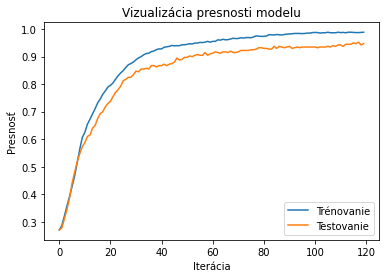

In [ ]:
# vytvoríme grafy pre presnosť z trénovacích a validačných dát 
plt.plot(network_training.history['accuracy'])
plt.plot(network_training.history['val_accuracy'])
# pridám označenie pre 'x' a 'y' os grafu
plt.ylabel('Presnosť')
plt.xlabel('Iterácia')
# pridanie názvu grafu
plt.title('Vizualizácia presnosti modelu')
# zorazenie legendy v grafe
# argumnty sú názvy a poloha samotnej legendy  
plt.legend(['Trénovanie', 'Testovanie'], loc='lower right')
# zobrazenie grafu
plt.show()

Následne vizualizujeme chybu pri trénovacích a testovacích dátach

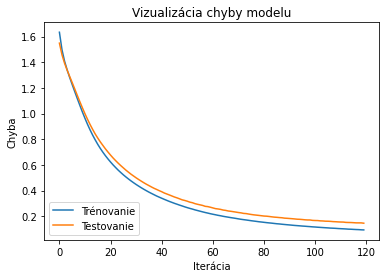

In [ ]:
# vytvoríme grafy pre chybu z trénovacích a validačných dát 
plt.plot(network_training.history['loss']) 
plt.plot(network_training.history['val_loss']) 
# pridám označenie pre 'x' a 'y' os grafu
plt.ylabel('Chyba') 
plt.xlabel('Iterácia')
# pridanie názvu grafu
plt.title('Vizualizácia chyby modelu') 
# zorazenie legendy v grafe
# argumnty sú názvy a poloha samotnej legendy  
plt.legend(['Trénovanie', 'Testovanie'], loc='lower left') 
# zobrazenei grafu
plt.show()